In [52]:
from collections import namedtuple, Counter
import os
import re

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tweepy
from wordcloud import WordCloud, STOPWORDS
# import wordcloud

Tweet = namedtuple('Tweet', 'id text created likes rts')

TWITTER_ACCOUNT = 'anthlis'

In [53]:
TWITTER_KEY=""
TWITTER_SECRET=""
TWITTER_ACCESS_TOKEN=""
TWITTER_ACCESS_SECRET=""

In [54]:
auth = tweepy.OAuthHandler(TWITTER_KEY, TWITTER_SECRET)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_SECRET)
api = tweepy.API(auth)
api

In [55]:
def get_tweets():
    for tw in tweepy.Cursor(api.user_timeline, screen_name=TWITTER_ACCOUNT,
                            exclude_replies=False, include_rts=True).items():
        yield Tweet(tw.id, tw.text, tw.created_at, tw.favorite_count, tw.retweet_count)

In [56]:
tweets = list(get_tweets())

In [57]:
len(tweets)

1273

In [58]:
excl_rts = [tweet for tweet in tweets if not tweet.text.startswith('RT')]
top_10 = sorted(excl_rts, key=lambda tw: (tw.likes + tw.rts)/2, reverse=True)

fmt = '{likes:<5} | {rts: <5} | {text}'
print(fmt.format(likes='❤', rts='♺', text='✎'))
print('-'*100)
for tw in top_10[:5]:
    print(fmt.format(likes=tw.likes, rts=tw.rts, text=tw.text.replace('\n', ' ⏎ ')))

❤     | ♺     | ✎
----------------------------------------------------------------------------------------------------
24    | 16    | Day 43: #100DaysOfCode progress: today I worked on Consuming HTTP services / D1 (lectures). API's are an old friend… https://t.co/hzes8yh5cr
19    | 13    | Day 57: #100DaysOfCode Uplink / D3 I’ve learnt Uplink is a simple pythonic way of building a client-side API, rathe… https://t.co/mY1PXi7YZN
16    | 9     | Day 52: #100DaysOfCode progress: today I worked on Parsing RSS feeds with Feedparser / D1 (lectures). Used requests… https://t.co/xuK6dVDq8r
13    | 7     | Day 44: #100DaysOfCode progress: today I worked on Consuming HTTP services / D2 (practice). Success!! 🥳 Search term… https://t.co/0SThL0NjYG
11    | 8     | Day 54: #100DaysOfCode progress: Parsing RSS feeds with Feedparser / D3 (more coding) I struggled tonight to determ… https://t.co/YMsEXNDwcH


In [59]:
hashtag = re.compile(r'#[-_A-Za-z0-9]+')
mention = re.compile(r'@[-_A-Za-z0-9]+')

all_tweets = ' '.join([tw.text.lower() for tw in tweets])
all_tweets_excl_rt = ' '.join([tw.text.lower() for tw in tweets if not tw.text.startswith('RT')])

hashtags = hashtag.findall(all_tweets)
cnt = Counter(hashtags)
cnt.most_common(20)

[('#100daysofcode', 62),
 ('#avgeek', 42),
 ('#cf15', 8),
 ('#python', 7),
 ('#stem', 5),
 ('#aviation', 5),
 ('#mtb', 4),
 ('#avgeeks', 3),
 ('#iss', 3),
 ('#ces2016', 3),
 ('#iot', 3),
 ('#twittervforce', 3),
 ('#bluetooth', 3),
 ('#ff', 3),
 ('#eqnz', 3),
 ('#pycon2019', 2),
 ('#worldpilotsday', 2),
 ('#twnz18', 2),
 ('#strava', 2),
 ('#cycling', 2)]

In [60]:
mentions = mention.findall(all_tweets)
cnt = Counter(mentions)
cnt.most_common(15)

[('@nzaircraftfan', 53),
 ('@talkpython', 39),
 ('@vaughndavis', 38),
 ('@clarinox', 30),
 ('@elwick70', 15),
 ('@stevebiddle', 14),
 ('@flying_geek', 13),
 ('@flyairnz', 12),
 ('@pronto97', 11),
 ('@pybites', 11),
 ('@pycharm', 10),
 ('@omakaairshow', 10),
 ('@raestimr', 9),
 ('@kickstarter', 9),
 ('@aerospacenz', 9)]

In [61]:
mentions = mention.findall(all_tweets_excl_rt)
cnt = Counter(mentions)
cnt.most_common(15)

[('@nzaircraftfan', 51),
 ('@talkpython', 39),
 ('@vaughndavis', 36),
 ('@clarinox', 19),
 ('@stevebiddle', 14),
 ('@elwick70', 13),
 ('@flying_geek', 12),
 ('@pronto97', 11),
 ('@pybites', 11),
 ('@pycharm', 10),
 ('@kickstarter', 9),
 ('@westpacnz', 8),
 ('@pyimagesearch', 8),
 ('@pylonsproject', 8),
 ('@flyairnz', 8)]

In [65]:
all_tweets_excl_rts_mentions = ' '.join([tw.text.lower() for tw in tweets 
                                        if not tw.text.startswith('RT') and not tw.text.startswith('@')])

In [66]:
pb_mask = np.array(Image.open("aero.png"))
stopwords = set(STOPWORDS)

stopwords.add('co')
stopwords.add('https')

wc = WordCloud(background_color="white", max_words=2000, mask=pb_mask,
               stopwords=stopwords)

wc.generate(all_tweets_excl_rts_mentions)

(-0.5, 410.5, 410.5, -0.5)

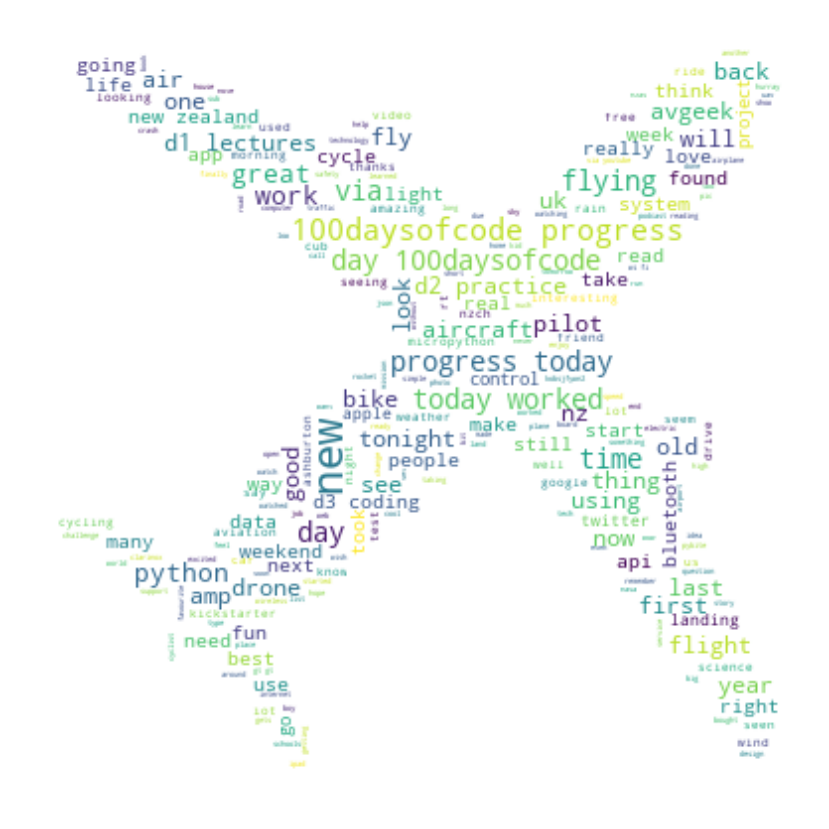

In [67]:
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation="bilinear")
plt.margins(x=0, y=0)
plt.axis("off")

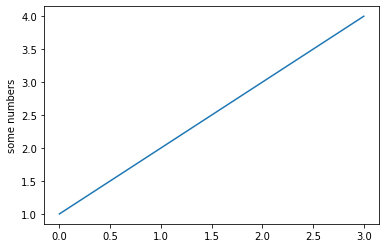

In [14]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

In [15]:
import requests

In [16]:
import matplotlib

In [17]:
import wordcloud